<a href="https://colab.research.google.com/github/ksujith-2000/Medical_Appointment_EDA/blob/main/Medical_Appointment_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigate Medical Appointment Dataset

In [1]:
#importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#choose plots style
sns.set_style('darkgrid')
#make sure plots are inline with the notebook
%matplotlib inline

In [2]:
## Loading the dataset and checking the columns we have

### Load your data and print out a few lines. Perform operations to inspect data
### Types and look for instances of missing or possibly errant data.
df = pd.read_csv('/content/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [4]:
### Check if there is any missing values in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [5]:
### Check if there is any duplicated rows in our data
df.duplicated().any()

False

# Data Cleaning

*   Drop irrelevant columns
*   Modify column names
*   Correct data types
*   Invert no-show column in to show with integer values
*   Create a new column for days difference between scheduling an appointment



In [6]:
### Drop irrelevant columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
### Change all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [8]:
### Change data columns to data type
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [9]:
### Turn no_show column to show
print(df.no_show.unique())
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
print(df.show.unique())
df.head()

['No' 'Yes']
[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [10]:
### Create a new column for days difference between scheduling and appointment
day_diff=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days
df.insert(3,'day_diff',day_diff)
df.day_diff.dtype

dtype('int64')

In [11]:
### Check data one last time
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
show                            int64
dtype: object

Now that we cleaned our data and also with proper data types for each and every column, we also added a new column which is created based on the time difference from the scheduled date and appointment date. Now we start to analyse the data.

## Exploratory Data Analysis

In [12]:
#define function to get the ratio of show in different categories
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar',
                                    edgecolor='black',
                                    figsize=(14,8)).set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())
#     plt.legend()

In [13]:
#get some statistics about our data
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Percentage of Patients who didn't show up for their appointment.

percentage of patients who didn't show up for their appointment is 20.193255946510803 %


,show
show,
0,22319
1,88208


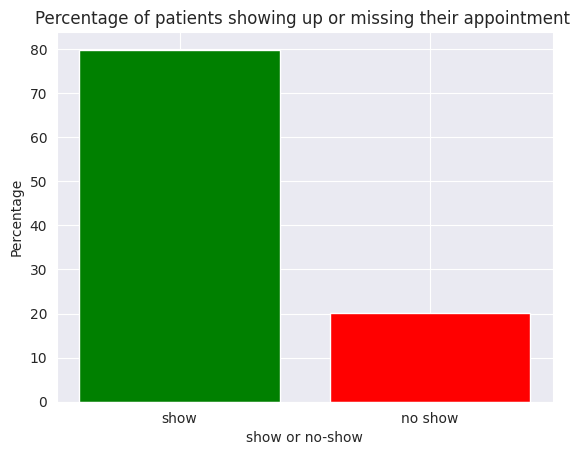

In [15]:
# percentage of show and no show
print(f"percentage of patients who didn't show up for their appointment is { (1-df.show.mean())*100 } %" )
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
display(df.groupby('show')[['show']].count())

Key factors to consider in order to predict if a patient shows up for their appointment or not ?

In [18]:
#create filters for show and no-show
show = (df.show == 1)
no_show = (df.show == 0)
total_miss = len(df[no_show])
total=len(df)

Percentage of Females and Males who missed their appointment

percentage of Females and Males who missed their appointment:


,gender
F,13.204013
M,6.989242


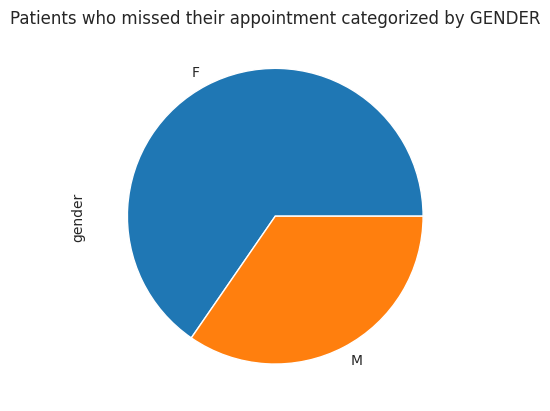

In [22]:
#get the number of patients missing their appointments by gender
no_show_gender=df[no_show]['gender'].value_counts()
no_show_gender.plot(kind='pie');
plt.title('Patients who missed their appointment categorized by GENDER');
print('percentage of Females and Males who missed their appointment:')
#get the percentage of patients missing their appointments by gender
pd.DataFrame(no_show_gender*100/total)

Text(0, 0.5, 'number of patients')

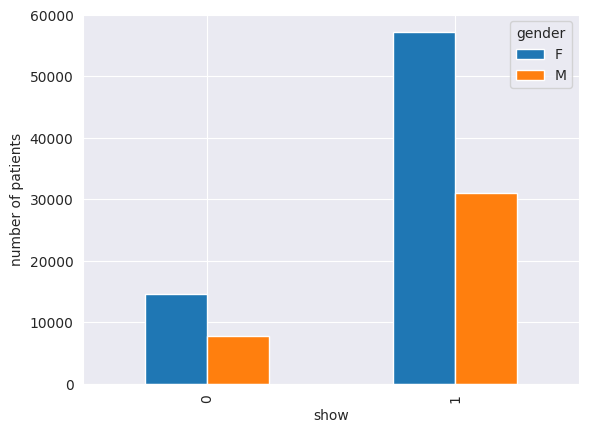

In [23]:
df.groupby(['gender','show']).size().unstack('gender').plot(kind='bar').set_ylabel('number of patients')

Finding:

>
The percentage of females not showing up for their scheduled appointment is nearly two times the number of males. So females are more likely to miss their appointment.




## Are patients with scholarships more likely to miss their appointment?

,show
scholarship,
0,0.801928
1,0.762637


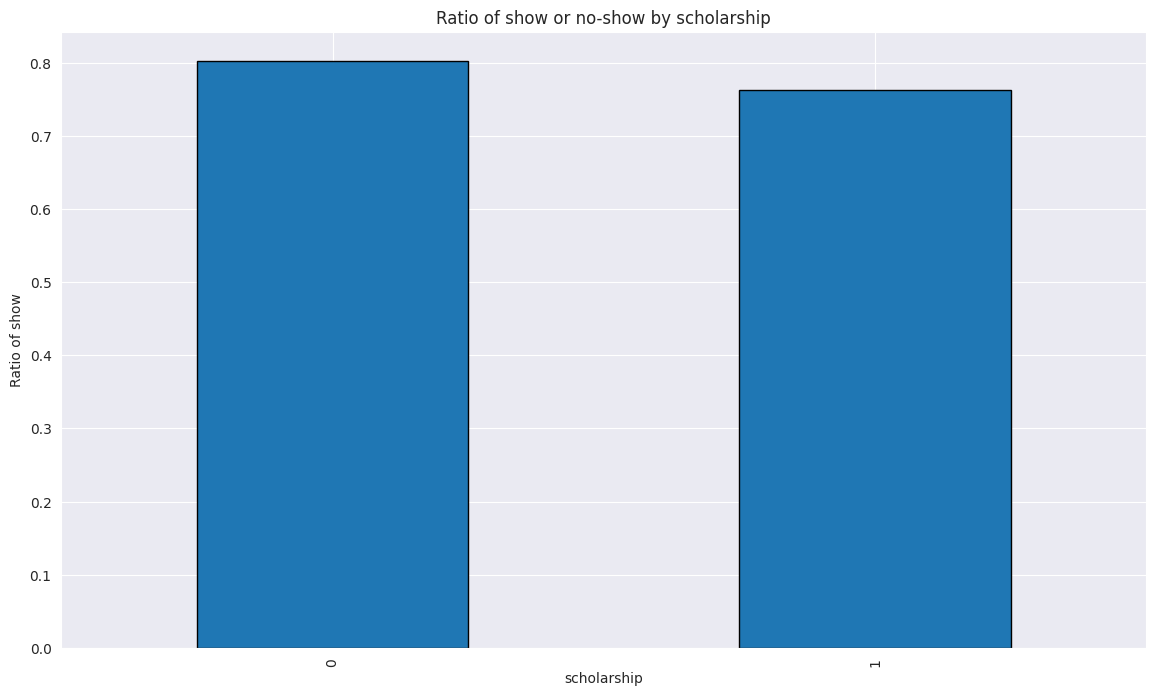

In [24]:
#what is the percentage of patients missing their appointment by scholarship
plot_rat(df.scholarship)
plt.title('Ratio of show or no-show by scholarship');
# df.groupby('scholarship')[['show']].mean()

Finding:



 From the graph we can see that ratio of show and no-show based on scholarship shows not much difference but no-show and have scholarship have a slightly higher value than the other.


## Are Patients who don't recieve SMS are more likely to miss their appointment ?

,show
sms_received,
0,0.832967
1,0.724255


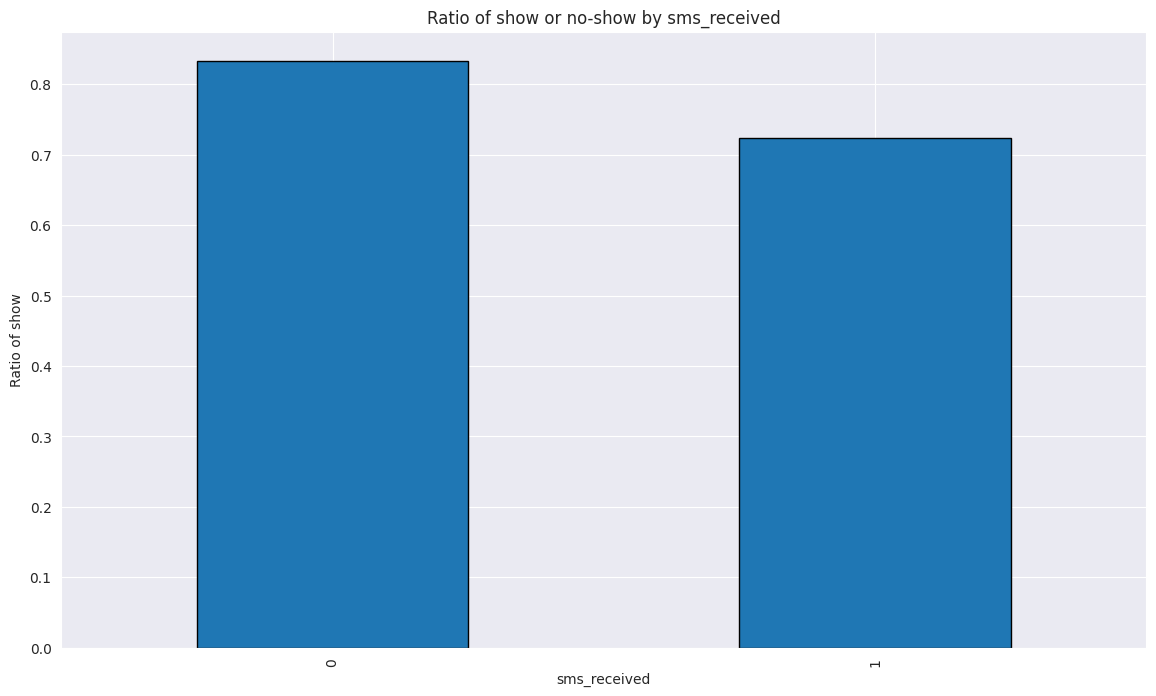

In [25]:
#what is the percentage of patient who attended their appointment by sms_received
plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received');

So from the above graph we can see that people who did not so up for their appointment are more even when they recieved test Message for their appointment.

### Is the time difference between the scheduling and appointment related to whether a patient will show?

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
more_than_15,38.460505
more_than_4,32.922622
fewdays,20.565438
sameday,8.029034


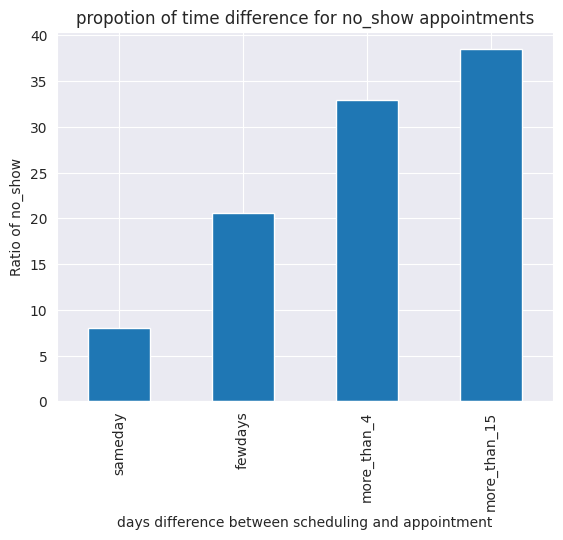

In [29]:
#filter for positive day difference
df1=df[df.day_diff>=0]
# df1.day_diff.unique()
#turn day diff into categorical column Day_diff2
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)
#filter for no_show records and count values for each category of day_diff2

no_show_day_diff=df[no_show].day_diff2.value_counts()/len(df[no_show])*100
no_show_day_diff.reindex(names).plot(kind='bar');
plt.title('propotion of time difference for no_show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no_show');
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

### Does age affect whether a patient will show up or not?

,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


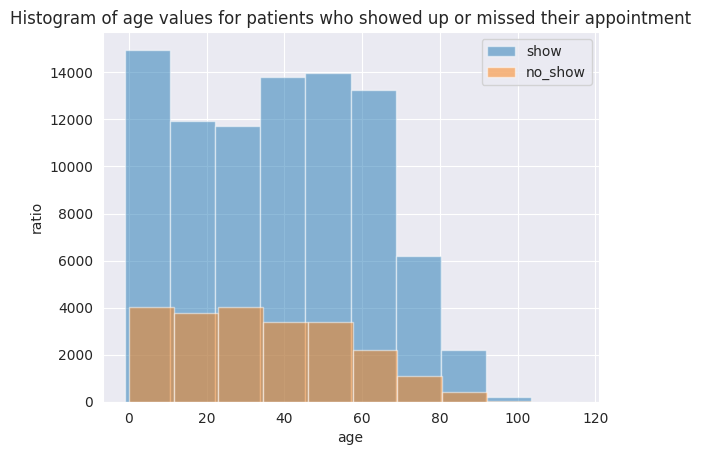

In [31]:
#plot the histograns of age for patients who showed up and who didn't
df[show].age.hist(alpha=0.5,label='show')
df[no_show].age.hist(alpha=0.5,label='no_show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
#ger the mean age for patients who showed up and who didn't
df[no_show][['age']].describe()

Finding

There is no clear relation between the age and whether the patient shows up or not but younger patients are more likely to miss their appointments.

## What is the percentage of patients missing their appointments for every neighborhood?

In [33]:
#get the number of records for each neighbourhood
rec_neigh=df['neighbourhood'].value_counts()
#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no_show=df[no_show].neighbourhood.value_counts()
#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage=rec_neigh_no_show/rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
...,...
SOLON BORGES,0.147122
MÁRIO CYPRESTE,0.145553
AEROPORTO,0.125000
ILHA DO BOI,0.085714


# Conclusions
### Following a thorough analysis of the dataset, the following key observations have been made:


* The non-attendance rate for appointments stands at 20.19%.
* Females exhibit a nearly twofold higher tendency to miss their appointments compared to males, indicating a gender-based trend.
* Notably, a direct relationship seems to exist between the duration between scheduling and the actual appointment date and the likelihood of a patient not attending.
* Surprisingly, patients with scholarships are found to have a higher probability of missing their appointments, contradicting the initial expectation.
*  An unexpected finding emerges where patients who received an SMS reminder are actually more prone to missing their appointments.
* While no distinct correlation between age and appointment attendance is evident, younger patients appear to have a higher likelihood of missing their scheduled appointments.

These insights provide a comprehensive overview of the factors influencing appointment attendance and contribute valuable information to future healthcare scheduling strategies.



